# Developing Sophisticated Interfaces Using Jupyter Widgets

While BPTK_Py offers a number of high-level functions to quickly create a dashboard (e.g. bptk.dashboard), you may sometimes be in a situation when you want to build a more sophisticated interface to your simulation or use some widget library that is not supported by BPTK_Py out of the box. 

This is actually quite easy once you understand how to access the underlying data generated by a scenario.

In [1]:
## BPTK Package
from BPTK_Py.bptk import bptk 

bptk = bptk()

Let's see how we can recreate the plot below directly from the underlying data:

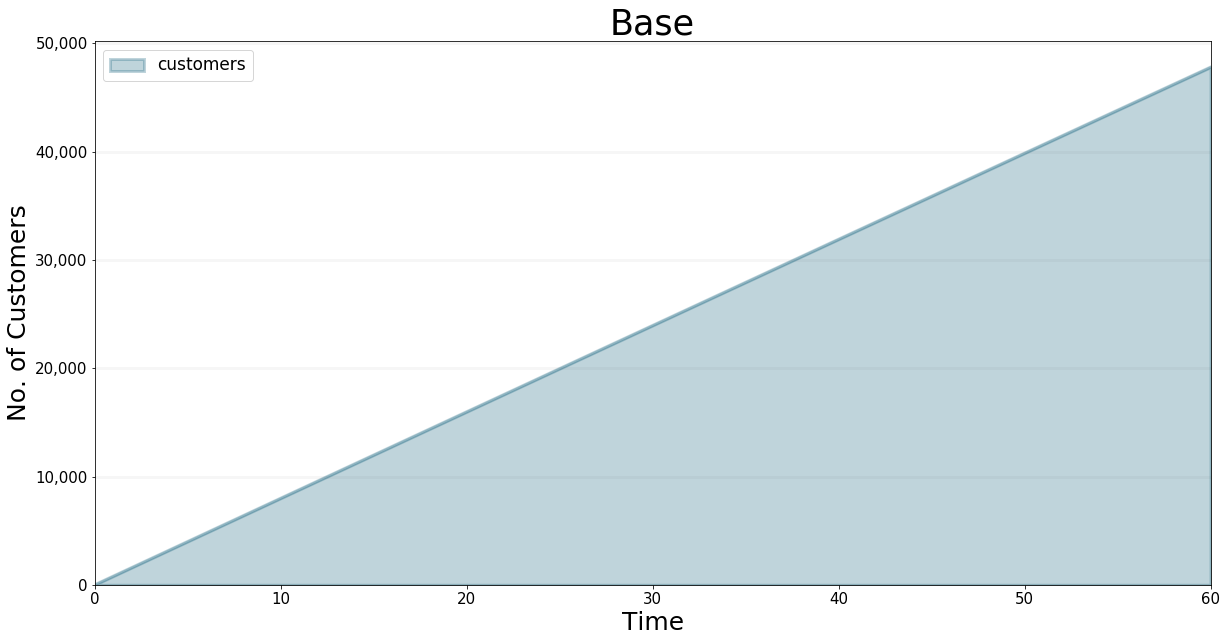

In [7]:
 df=bptk.plot_scenarios(
        scenario_managers=["smCustomerAcquisition"],
        scenarios=["base"], 
        equations=['customers'],
        title="Base",
        freq="M",
        x_label="Time",
        y_label="No. of Customers"
        )

You can access the data generated by a scenario by saving it into a dataframe. You can do this by adding the `return_df` flag to `bptk.plot_scenario`:

In [2]:
 df=bptk.plot_scenarios(
        scenario_managers=["smCustomerAcquisition"],
        scenarios=["base"], 
        equations=['customers'],
        title="Base",
        freq="M",
        x_label="Time",
        y_label="No. of Customers",
        return_df=True
        )

The dataframe is indexed by time and stores the equations (in SD models) or agent properties (in Agent-based models) in the columns

In [3]:
df

,customers
t,
0,0.000000
1,800.000000
2,1599.893333
3,2399.680014
4,3199.360057
5,3998.933476
6,4798.400284
7,5597.760498
8,6397.014130


The frameworks `bptk.plot_scenarios` method first runs the simulation using the setting defined in the scenario and stores the data in a dataframe. It then plots the dataframe using Pandas `df.plot`method.

We can do the same:

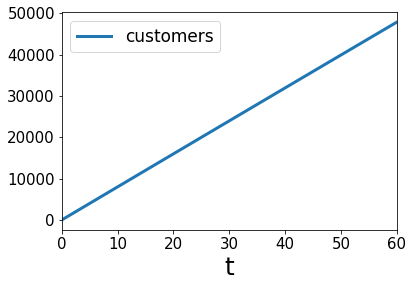

In [5]:
df.plot()

The plot above doesn't look quite as neat as the plots created by `bptk.plot_scenarios`– this is because the framework applies some styling information. The styling information is stored in BPTK_Py.config, and you can access (and modify) it there.

Now let's apply the config to `df.plot`:

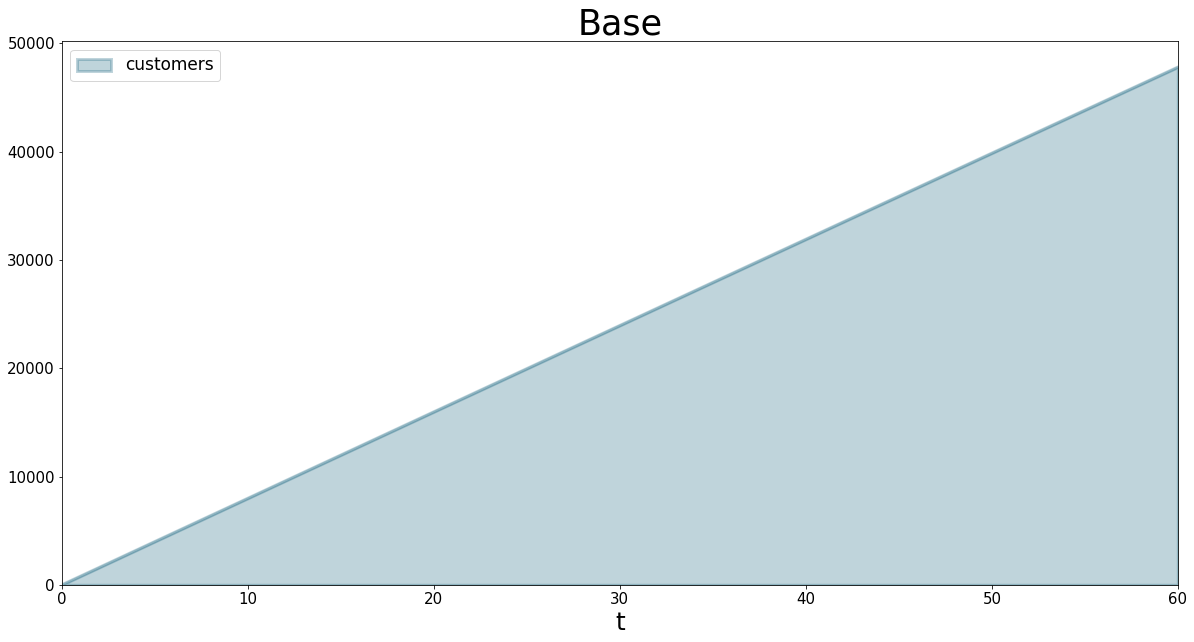

In [6]:
import BPTK_Py.config as config
subplot=df.plot(kind=config.configuration["kind"],
                       alpha=config.configuration["alpha"], stacked=config.configuration["stacked"],
                                                          figsize=config.configuration["figsize"],
                                                          title="Base",
                                                          color=config.configuration["colors"],
                                                          lw=config.configuration["linewidth"])

As a little challenge, we could try to build a dashboard for our simulation that let's you manipulate some of the scenrio settings and plots the results for different equations in different tabs.

First, we need to understand how to create tabs. For this we need to import the `ipywidget` Library and we also need to access Matplotlib's `pyplot`

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

Then we can create some tabs that display scenario results as follows:

In [11]:
out1 = widgets.Output()
out2 = widgets.Output()

tab = widgets.Tab(children = [out1, out2])
tab.set_title(0, 'Profit')
tab.set_title(1, 'Customers')
display(tab)

with out1:
    # turn of pyplot's interactive mode to ensure the plot is not created directly
    plt.ioff() 
    # create the plot, but don't show it yet
    bptk.plot_scenarios(
        scenario_managers=["smCustomerAcquisition"],
        scenarios=["hereWeGo"], 
        equations=['customers'],
        title="Here We Go",
        freq="M",
        x_label="Time",
        y_label="No. of Customers"
        )
    # show the plot
    plt.show()
    # turn interactive mode on again
    plt.ion()

with out2:
    plt.ioff()
    bptk.plot_scenarios(
        scenario_managers=["smCustomerAcquisition"],
        scenarios=["hereWeGo"], 
        equations=['profit'],
        title="Here We Go",
        freq="M",
        x_label="Time",
        y_label="Euro"
        )
    plt.show()
    plt.ion()
    

That was easy - now let's add some sliders to manipulate the following scenario settings:

* Referrals
* Referral Free Months
* Referral Program Adoption %
* Advertising Success %

## Interactive Dashboard

In [12]:
bptk.dashboard(scenario_managers=["smCustomerAcquisition"],
                                scenarios=["base"],
                                kind="area",
                                equations=["customers"],
                                stacked=False,
                                strategy=False,
                                freq="M",
                                title="Customers",
                                x_label="Months",
                                y_label="No. of Customers",
                                constants=[
                                    ("slider",'referrals',0,15,1),
                                    ("slider","referralFreeMonths",0,15,1),
                                    ("slider","referralProgramAdoptionPct",0,100,1),
                                    ("slider","advertisingSuccessPct",0,100,1),
                                ]
                                )

interactive(children=(IntSlider(value=7, continuous_update=False, description='referrals', layout=Layout(width…

## Scenario "Here We Go"

In [5]:
tabs("hereWeGo", "Here We Go")

## Scenario "Service Flop"

In [15]:
tabs("serviceFlop", "Service Flop")

## Scenario "Refer Someone, Please!"

In [17]:
tabs("referSomeonePlease", "Refer Someone, Please!")

## Scenario "Rethink Advertising" 

In [18]:
tabs("rethinkAdvertising", "Rethink Advertising")

## Scenario "Boom, But Bust"

In [19]:
tabs("boomButBust", "Boom But Bust")